In [0]:
# Widgets ----------------->>

In [0]:
dbutils.widgets.dropdown('Symbol','HDFC',['HDFC','TCS','TITAN','BAJAUTOFIN','ASIANPAINT','INFOSYSTCH','HINDLEVER','DRREDDY','BHARTIARTL'],'Choose Stocks')
from pyspark.sql.window import Window
from pyspark.sql import functions as f
df2 = spark.read.csv('dbfs:/FileStore/PortfolioProject/Stock_price.csv',header = True,inferSchema = True)
T =dbutils.widgets.get('Symbol')
df_p = df2.filter(df2['Symbol']==T).select('Date','Last').toPandas()
df_p

,Date,Last
0,2000-01-03,50.75
1,2000-01-04,48.00
2,2000-01-05,44.60
3,2000-01-06,46.00
4,2000-01-07,42.90
...,...,...
2606,2010-09-22,770.00
2607,2010-09-23,771.00
2608,2010-09-24,770.15
2609,2010-09-27,791.05


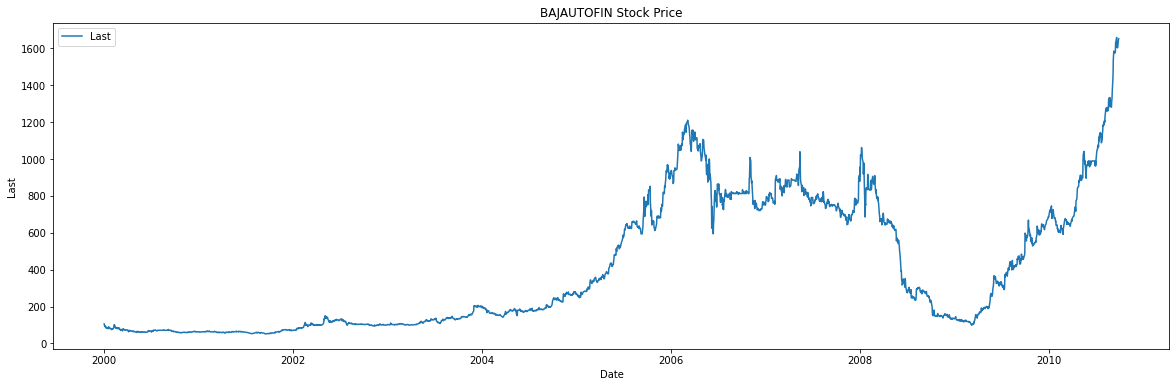

In [0]:
import matplotlib.pyplot as plt
if len(df_p) > 1:
    df_p.set_index('Date', inplace=True)  # Set 'Date' as the index
    df_p['Last'] = (df_p['Last'] / df_p['Last'].iloc[1] * 100)
    df_p.plot(y='Last', figsize=(20, 6))
    plt.xlabel('Date')  # Set x-axis label
    plt.ylabel('Last')  # Set y-axis label
    plt.title(f'{T} Stock Price')  # Set plot title
    plt.show()
else:
    print("DataFrame has insufficient data points for plotting.")

In [0]:
returns_p = (df_p['Last']/df_p['Last'].shift(1)) -1
returns_p

Out[200]: Date
2000-01-03         NaN
2000-01-04   -0.054187
2000-01-05   -0.070833
2000-01-06    0.031390
2000-01-07   -0.067391
                ...   
2010-09-22   -0.003881
2010-09-23    0.001299
2010-09-24   -0.001102
2010-09-27    0.027138
2010-09-28    0.002465
Name: Last, Length: 2611, dtype: float64

In [0]:
annual_return = returns_p.mean()*250*100
annual_return

Out[201]: 40.458734847441505

In [0]:
# Partitioning & Bucketing ---------------->>

In [0]:
# Load Datasets
df = spark.read.csv('dbfs:/FileStore/PortfolioProject/Stock_price.csv',header = True,inferSchema = True)
df.show()

+----------+----------+------+----------+------+------+-------+-------+-------+-------+--------+--------+------+------------------+-----------+--------------+------------------+
|      Date|    Symbol|Series|Prev Close|  Open|  High|    Low|   Last|  Close|   VWAP|  Volume|Turnover|Trades|Deliverable Volume|%Deliverble|        Sector|          Industry|
+----------+----------+------+----------+------+------+-------+-------+-------+-------+--------+--------+------+------------------+-----------+--------------+------------------+
|2007-11-27|MUNDRAPORT|    EQ|     440.0| 770.0|1050.0|  770.0|  959.0|  962.9| 984.72|27294366| 2.69E15|  null|           9859619|     0.3612|Infrastructure|Ports and Shipping|
|2007-11-28|MUNDRAPORT|    EQ|     962.9| 984.0| 990.0|  874.0|  885.0|  893.9| 941.38| 4581338| 4.31E14|  null|           1453278|     0.3172|Infrastructure|Ports and Shipping|
|2007-11-29|MUNDRAPORT|    EQ|     893.9| 909.0|914.75|  841.0|  887.0|  884.2| 888.09| 5124121| 4.55E14|  nul

In [0]:
%fs rm -r/dbfs:/user/hive/warehouse/partbucketstock

res5: Boolean = false

In [0]:
# Save the DataFrame as a table

df.write.option('header', True).partitionBy('Sector').bucketBy(5, 'Industry').mode('overwrite').saveAsTable('PartBucketStocks2', format='parquet')

# Read the table back into a DataFrame
df = spark.table('PartBucketStocks2')

# Show the data from the DataFrame
df.show()


+----------+------+------+----------+------+------+------+------+------+------+------+--------+------+------------------+-----------+--------------------+----------+
|      Date|Symbol|Series|Prev Close|  Open|  High|   Low|  Last| Close|  VWAP|Volume|Turnover|Trades|Deliverable Volume|%Deliverble|            Industry|    Sector|
+----------+------+------+----------+------+------+------+------+------+------+------+--------+------+------------------+-----------+--------------------+----------+
|2000-01-03|   M&M|    EQ|    419.75| 453.3|453.35| 448.9|453.35|453.35|453.18| 67195| 3.05E12|  null|              null|       null|Automobiles - Pas...|Automotive|
|2000-01-04|   M&M|    EQ|    453.35| 489.6|489.65| 489.6|489.65|489.65|489.65| 37470| 1.83E12|  null|              null|       null|Automobiles - Pas...|Automotive|
|2000-01-05|   M&M|    EQ|    489.65|528.85|528.85|451.15| 519.0|514.85|521.37|227621| 1.19E13|  null|              null|       null|Automobiles - Pas...|Automotive|
|200

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
df.printSchema()

root
 |-- Date: date (nullable = true)
 |-- Symbol: string (nullable = true)
 |-- Series: string (nullable = true)
 |-- Prev Close: double (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Last: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- VWAP: double (nullable = true)
 |-- Volume: integer (nullable = true)
 |-- Turnover: double (nullable = true)
 |-- Trades: integer (nullable = true)
 |-- Deliverable Volume: integer (nullable = true)
 |-- %Deliverble: string (nullable = true)
 |-- Industry: string (nullable = true)
 |-- Sector: string (nullable = true)



In [0]:
df.describe().toPandas()

,summary,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Industry,Sector
0,count,235192,235192,235192,235192,235192,235192,235192,235192,235192,235192,235192,120344,219115,219115,229887,229887
1,mean,None,None,1266.196348727844,1267.7597082383663,1286.5814404826638,1247.4884653814634,1266.388301898019,1266.5543507007,1267.1323001207543,3045903.286030137,1.610122027316167E14,61964.27098151964,1315098.408342651,0.5029985368347065,None,None
2,stddev,None,None,2581.3703203038617,2585.259609461142,2619.6492164496135,2546.621395806379,2581.3925428034377,2582.140941701451,2582.699979519191,7333980.756791677,3.2977608109119E14,68664.57016208595,2831669.890222605,0.19001814418030957,None,None
3,min,ADANIPORTS,EQ,0.0,8.5,9.75,8.5,9.1,9.15,9.21,3,1.047E7,11,5,0.0236,Agricultural Chemicals,Automotive
4,max,ZEETELE,EQ,32861.95,33399.95,33480.0,32468.1,32849.0,32861.95,32975.24,481058927,3.56E16,1643015,232530747,1,Wireless Telecommunications Services,Utilities


In [0]:
df.count()

Out[172]: 235192

In [0]:
df.select(['Open','High','Low','Close']).describe().show()

+-------+------------------+------------------+------------------+-----------------+
|summary|              Open|              High|               Low|            Close|
+-------+------------------+------------------+------------------+-----------------+
|  count|            235192|            235192|            235192|           235192|
|   mean|1267.7597082383663|1286.5814404826638|1247.4884653814634|  1266.5543507007|
| stddev| 2585.259609461142|2619.6492164496135| 2546.621395806379|2582.140941701451|
|    min|               8.5|              9.75|               8.5|             9.15|
|    max|          33399.95|           33480.0|           32468.1|         32861.95|
+-------+------------------+------------------+------------------+-----------------+



In [0]:
df.groupBy('Sector').count().show()

+--------------------+-----+
|              Sector|count|
+--------------------+-----+
|          Healthcare|15918|
|             Finance|36500|
|           Utilities| 7447|
|          Technology|23686|
|     Basic Materials|28018|
|  Financial Services| 8436|
|      Consumer Goods|44369|
|       Manufacturing| 8508|
|              Energy|23501|
|          Automotive| 5306|
|                null| 5305|
|Consumer Goods,Ag...| 5306|
|Energy,Technology...| 5306|
|  Telecommunications| 4774|
|Industrial,Techno...| 4184|
|      Infrastructure| 3322|
|   Consumer Services| 5306|
+--------------------+-----+



In [0]:
by_sector = df.select(['Sector','Open','Close']).groupBy('Sector').mean().collect()
by_sector

Out[175]: [Row(Sector='Healthcare', avg(Open)=1039.8831542907383, avg(Close)=1038.703615403944),
 Row(Sector='Finance', avg(Open)=802.0072328767147, avg(Close)=801.4350164383554),
 Row(Sector='Utilities', avg(Open)=146.8205451859812, avg(Close)=146.65783536994792),
 Row(Sector='Technology', avg(Open)=1324.4393945790794, avg(Close)=1322.7301486109961),
 Row(Sector='Basic Materials', avg(Open)=1797.9449675208787, avg(Close)=1796.8254015275904),
 Row(Sector='Financial Services', avg(Open)=1925.701446183027, avg(Close)=1925.016945234706),
 Row(Sector='Consumer Goods', avg(Open)=2339.9223252721517, avg(Close)=2337.4382936284487),
 Row(Sector='Manufacturing', avg(Open)=1918.4596203573112, avg(Close)=1917.7150740479542),
 Row(Sector='Energy', avg(Open)=377.5298668141771, avg(Close)=376.9443023701121),
 Row(Sector='Automotive', avg(Open)=687.5602525442888, avg(Close)=686.8726159065222),
 Row(Sector=None, avg(Open)=404.3018850141368, avg(Close)=403.6010367577756),
 Row(Sector='Consumer Goods,Ag

In [0]:
for row in by_sector:
    print(list(row),end ='\n')

['Healthcare', 1039.8831542907383, 1038.703615403944]
['Finance', 802.0072328767147, 801.4350164383554]
['Utilities', 146.8205451859812, 146.65783536994792]
['Technology', 1324.4393945790794, 1322.7301486109961]
['Basic Materials', 1797.9449675208787, 1796.8254015275904]
['Financial Services', 1925.701446183027, 1925.016945234706]
['Consumer Goods', 2339.9223252721517, 2337.4382936284487]
['Manufacturing', 1918.4596203573112, 1917.7150740479542]
['Energy', 377.5298668141771, 376.9443023701121]
['Automotive', 687.5602525442888, 686.8726159065222]
[None, 404.3018850141368, 403.6010367577756]
['Consumer Goods,Agri-Business,Hotels,Paperboards and Packaging,Information Technology', 420.63151149641936, 420.2736901620801]
['Energy,Technology,Retail,Petrochemicals,Textiles', 1012.602374670186, 1011.3168394270622]
['Telecommunications', 380.47845622119655, 379.8007645580231]
['Industrial,Technology,Financial', 1536.5592853728526, 1534.2743546845147]
['Infrastructure', 344.7630192655023, 344.201

In [0]:
sector_df = df.select(['Sector','Open','Close','Last']).groupBy('Sector').mean().toPandas()
sector_df

,Sector,avg(Open),avg(Close),avg(Last)
0,Healthcare,1039.883154,1038.703615,1038.657529
1,Finance,802.007233,801.435016,801.391548
2,Utilities,146.820545,146.657835,146.648852
3,Technology,1324.439395,1322.730149,1322.680803
4,Basic Materials,1797.944968,1796.825402,1796.265902
5,Financial Services,1925.701446,1925.016945,1925.077365
6,Consumer Goods,2339.922325,2337.438294,2337.069374
7,Manufacturing,1918.459620,1917.715074,1917.506653
8,Energy,377.529867,376.944302,376.946030
9,Automotive,687.560253,686.872616,686.834640


Out[178]: <AxesSubplot:ylabel='Sector'>

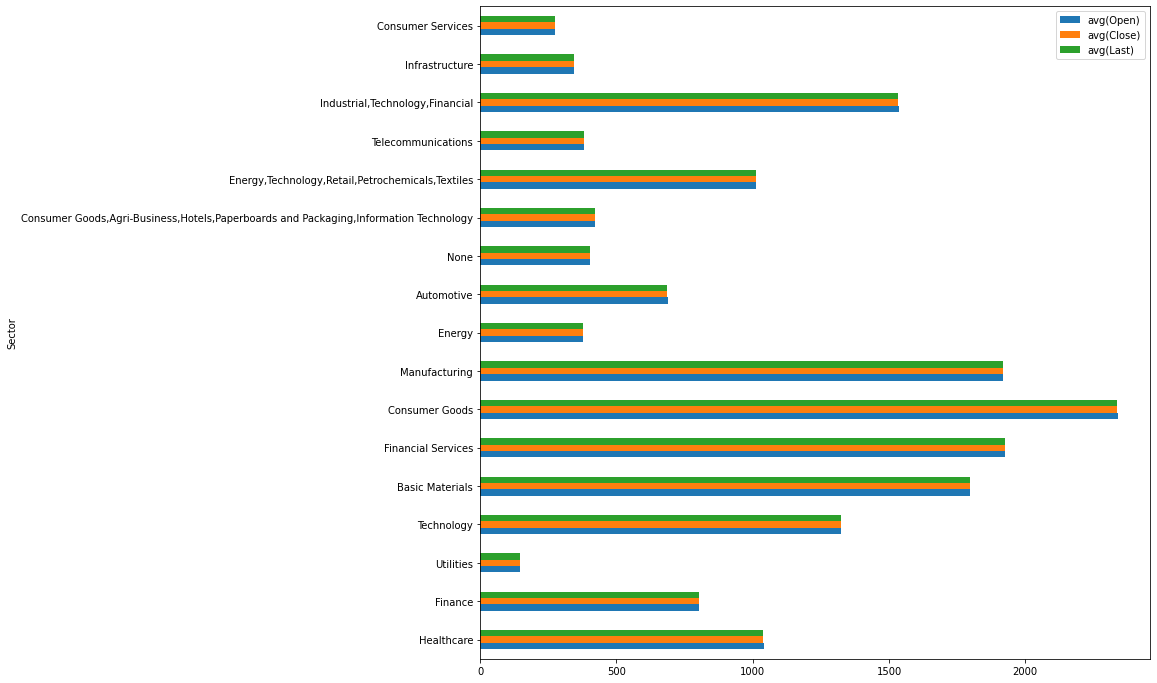

In [0]:
sector_df.plot(kind='barh', x='Sector', y=sector_df.columns.tolist()[1:], 
               figsize=(12,12))

In [0]:
industry_df = df.select(['Industry','Open','Close','Last'])\
                .groupBy('Industry').mean().toPandas()

Out[180]: <AxesSubplot:ylabel='Industry'>

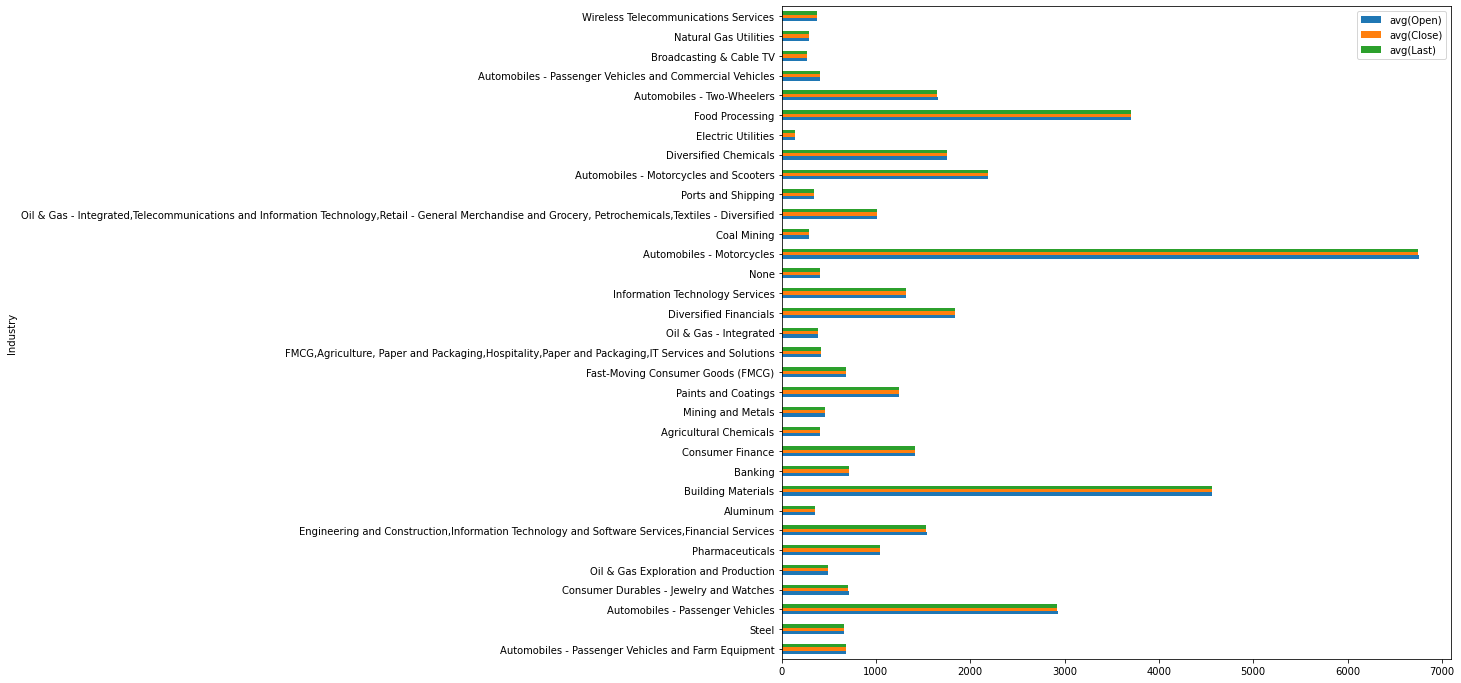

In [0]:
industry_df.plot(kind='barh', x='Industry', y=sector_df.columns.tolist()[1:], 
               figsize=(12,12))

In [0]:
import pyspark.sql.functions as f

In [0]:
health = df.filter(f.col('Sector')=='Healthcare')
health.show()

+----------+------+------+----------+------+-------+-------+-------+-------+-------+------+--------+------+------------------+-----------+---------------+----------+
|      Date|Symbol|Series|Prev Close|  Open|   High|    Low|   Last|  Close|   VWAP|Volume|Turnover|Trades|Deliverable Volume|%Deliverble|       Industry|    Sector|
+----------+------+------+----------+------+-------+-------+-------+-------+-------+------+--------+------+------------------+-----------+---------------+----------+
|2000-01-03| CIPLA|    EQ|    1349.4|1410.0|1457.35|1380.05|1457.35|1457.35|1441.36| 21060| 3.04E12|  null|              null|       null|Pharmaceuticals|Healthcare|
|2000-01-04| CIPLA|    EQ|   1457.35|1537.0| 1537.0| 1430.0|1466.05|1465.25|1460.43| 30215| 4.41E12|  null|              null|       null|Pharmaceuticals|Healthcare|
|2000-01-05| CIPLA|    EQ|   1465.25|1474.0| 1474.0| 1365.0| 1441.0|1435.05|1428.11| 33799| 4.83E12|  null|              null|       null|Pharmaceuticals|Healthcare|
|200

In [0]:
# Start/End Date, min, max, avg
from pyspark.sql.functions import col, min, max, avg


In [0]:
df.groupBy('Sector')\
    .agg(
        min('Date').alias('Start'),
        max('Date').alias('End'),

        min('open').alias('Minimum Opening'),
        max('open').alias('Maximum Opening'),
        avg('open').alias('Average Opening'),

        min('Close').alias('Minimum Closing'),
        max('Close').alias('Maximum Closing'),
        avg('Close').alias('Average Closing'),
    ).show(truncate=True)

+--------------------+----------+----------+---------------+---------------+------------------+---------------+---------------+------------------+
|              Sector|     Start|       End|Minimum Opening|Maximum Opening|   Average Opening|Minimum Closing|Maximum Closing|   Average Closing|
+--------------------+----------+----------+---------------+---------------+------------------+---------------+---------------+------------------+
|          Healthcare|2000-01-03|2021-04-30|         150.55|        5440.95|1039.8831542907383|          160.1|         5416.8| 1038.703615403944|
|             Finance|2000-01-03|2021-04-30|            8.5|         3505.0| 802.0072328767147|           9.15|        3489.95| 801.4350164383554|
|           Utilities|2004-11-05|2021-04-30|           61.7|          289.0| 146.8205451859812|           58.0|         284.65|146.65783536994792|
|          Technology|2000-01-03|2021-04-30|           87.1|        16800.0|1324.4393945790794|           89.7|       

Out[206]: array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

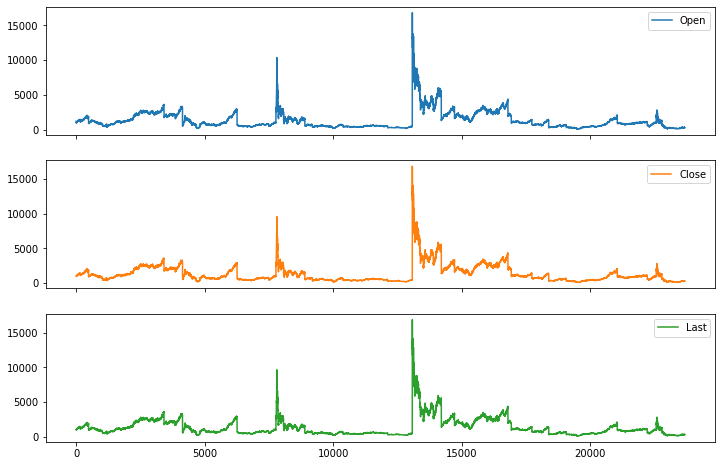

In [0]:
# Time Series
tech = df.where(col('Sector')=='Technology').select('Date','Open','Close','Last')
tech.toPandas().plot(subplots=True,figsize=(12,8))


In [0]:
df.filter(df['Last'].between(100,500)).show(5)

+----------+------+------+----------+------+-----+------+------+------+------+-------+--------+------+------------------+-----------+--------------------+----------+
|      Date|Symbol|Series|Prev Close|  Open| High|   Low|  Last| Close|  VWAP| Volume|Turnover|Trades|Deliverable Volume|%Deliverble|            Industry|    Sector|
+----------+------+------+----------+------+-----+------+------+------+------+-------+--------+------+------------------+-----------+--------------------+----------+
|2008-10-16|   TCS|    EQ|     543.1| 525.0|528.7| 467.9| 493.0| 495.0|494.57|2007950| 9.93E13|  null|           1017019|     0.5065|Information Techn...|Technology|
|2008-10-17|   TCS|    EQ|     495.0| 500.0|529.0| 445.0| 445.8|453.85|489.66|2435885| 1.19E14|  null|           1395432|     0.5729|Information Techn...|Technology|
|2008-10-20|   TCS|    EQ|    453.85|496.65|505.0|455.25| 500.0|491.35|482.28|3103265|  1.5E14|  null|           1962918|     0.6325|Information Techn...|Technology|
|200

In [0]:
# Using lit is useful when you want to perform operations that involve constant values or when you need to compare DataFrame columns with fixed values. It helps create a consistent and clear syntax for such operations
from pyspark.sql.functions import lit
df.filter((col('Date')>=lit('2020-01-01')) & (col('Date') <= lit('2020-01-31'))).show(5)

+----------+------+------+----------+-------+-------+------+-------+-------+-------+-------+--------+------+------------------+-----------+--------------------+----------+
|      Date|Symbol|Series|Prev Close|   Open|   High|   Low|   Last|  Close|   VWAP| Volume|Turnover|Trades|Deliverable Volume|%Deliverble|            Industry|    Sector|
+----------+------+------+----------+-------+-------+------+-------+-------+-------+-------+--------+------+------------------+-----------+--------------------+----------+
|2020-01-01|   TCS|    EQ|    2161.7| 2168.0| 2183.9|2154.0| 2170.0| 2167.6|2170.54|1354908| 2.94E14| 44438|            164490|     0.1214|Information Techn...|Technology|
|2020-01-02|   TCS|    EQ|    2167.6|2179.95|2179.95|2149.2| 2157.0|2157.65|2158.63|2380752| 5.14E14| 99242|           1204079|     0.5058|Information Techn...|Technology|
|2020-01-03|   TCS|    EQ|   2157.65| 2164.0| 2223.0|2164.0| 2201.0|2200.65|2199.26|4655761| 1.02E15|123516|           1833823|     0.3939|I

In [0]:
df.select('Open','Close',f.when(df['Last'] >= 200, 1).otherwise(0).alias('Strategy')).show()

+------+------+--------+
|  Open| Close|Strategy|
+------+------+--------+
| 453.3|453.35|       1|
| 489.6|489.65|       1|
|528.85|514.85|       1|
| 528.0|524.55|       1|
| 515.0| 496.4|       1|
| 509.9| 497.2|       1|
| 514.0| 532.8|       1|
| 540.0|490.25|       1|
| 516.0| 499.0|       1|
| 500.0| 519.0|       1|
| 538.0|560.55|       1|
| 570.0|573.95|       1|
| 601.0| 599.2|       1|
|597.95|572.35|       1|
| 585.0| 550.0|       1|
| 539.1| 514.7|       1|
| 516.0|507.25|       1|
| 540.0| 499.3|       1|
| 508.0| 511.1|       1|
| 507.0|507.75|       1|
+------+------+--------+
only showing top 20 rows



In [0]:
df.select('Sector',df['Sector'].rlike('^[B,C]').alias('Sector Starts with B or C')).distinct().show()

+--------------------+-------------------------+
|              Sector|Sector Starts with B or C|
+--------------------+-------------------------+
|           Utilities|                    false|
|          Healthcare|                    false|
|             Finance|                    false|
|     Basic Materials|                     true|
|          Technology|                    false|
|  Financial Services|                    false|
|       Manufacturing|                    false|
|      Consumer Goods|                     true|
|          Automotive|                    false|
|              Energy|                    false|
|                null|                     null|
|Consumer Goods,Ag...|                     true|
|  Telecommunications|                    false|
|Energy,Technology...|                    false|
|Industrial,Techno...|                    false|
|      Infrastructure|                    false|
|   Consumer Services|                     true|
+-------------------